### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os
print(os.listdir("data"))

['Cat', 'Dog']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import random

### Reading the data

In [3]:
cat_data = os.listdir('data/Cat/')
print(cat_data[:10])

dog_data = os.listdir('data/Dog/')
print('\n')
print(dog_data[:10])

['Abyssinian_1.jpg', 'Abyssinian_10.jpg', 'Abyssinian_100.jpg', 'Abyssinian_101.jpg', 'Abyssinian_102.jpg', 'Abyssinian_103.jpg', 'Abyssinian_104.jpg', 'Abyssinian_105.jpg', 'Abyssinian_106.jpg', 'Abyssinian_107.jpg']


['american_bulldog_10.jpg', 'american_bulldog_100.jpg', 'american_bulldog_101.jpg', 'american_bulldog_102.jpg', 'american_bulldog_103.jpg', 'american_bulldog_104.jpg', 'american_bulldog_105.jpg', 'american_bulldog_106.jpg', 'american_bulldog_107.jpg', 'american_bulldog_108.jpg']


In [4]:
print("Cat Images :",len(cat_data))
print("Dog Images :",len(dog_data))

Cat Images : 4784
Dog Images : 4990


### DATA PREPROCESSING:
### Sample Images from Dataset:

### Cat

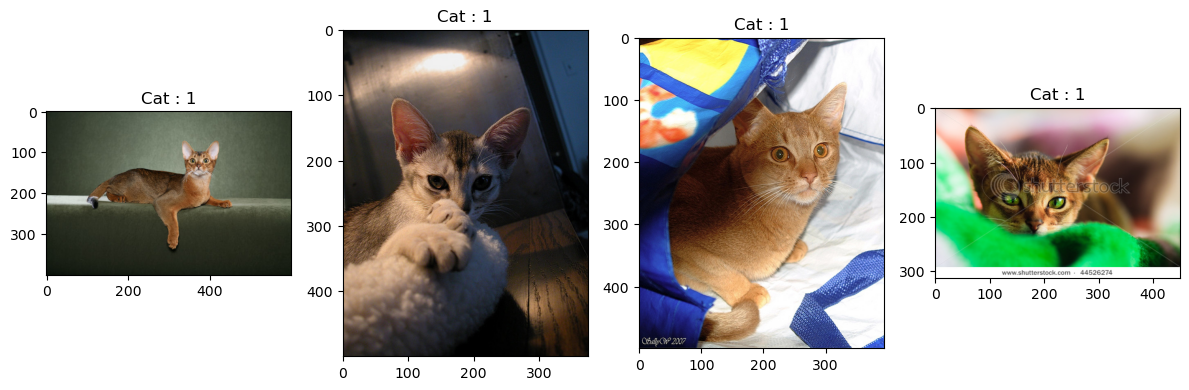

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('data/Cat/' + "/" + cat_data[i])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Cat : 1')
    plt.tight_layout()
plt.show()

### Dog

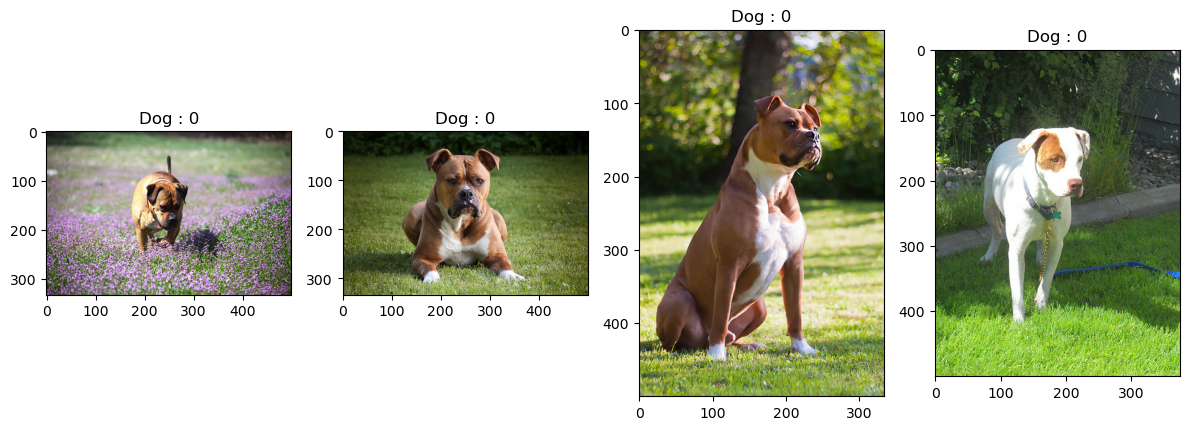

In [6]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('data/Dog/' + "/" + dog_data[i+1])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Dog : 0')
    plt.tight_layout()
plt.show()

### Resizing Image:

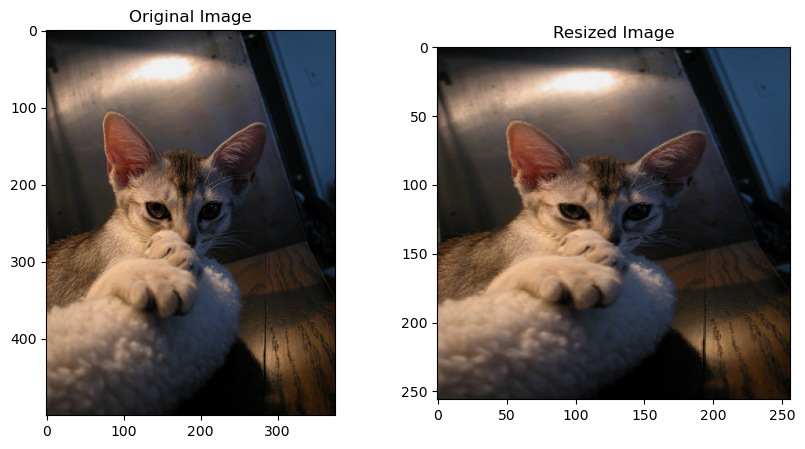

In [7]:
img = cv2.imread('data/Cat/' + "/" + cat_data[1])

resized_img = cv2.resize(img, (256, 256))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Resized Image')
plt.show()

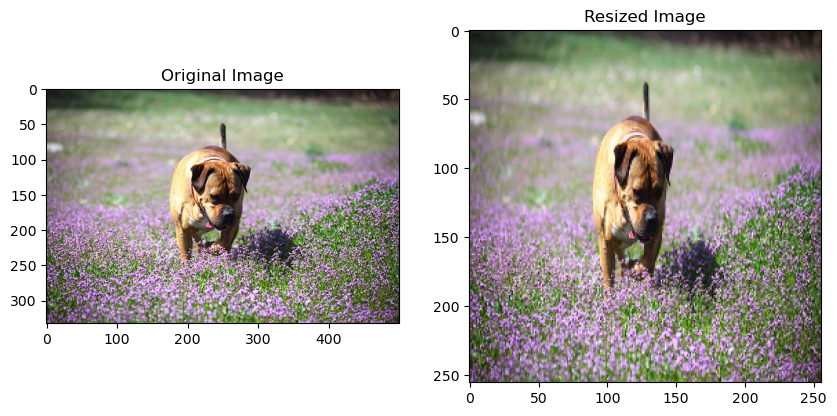

In [8]:
img = cv2.imread('data/Dog/' + "/" + dog_data[1])

resized_img = cv2.resize(img, (256, 256))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Resized Image')
plt.show()

### GrayScale Conversion:

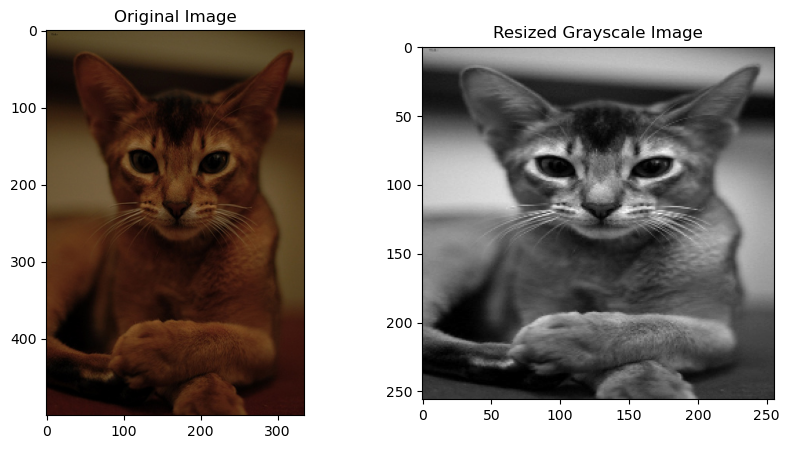

In [9]:
img = cv2.imread('data/Cat/' + "/" + cat_data[163])

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_gray_img = cv2.resize(gray_img, (256, 256))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(resized_gray_img, cmap='gray')
ax[1].set_title('Resized Grayscale Image')
plt.show()

### Normalization:

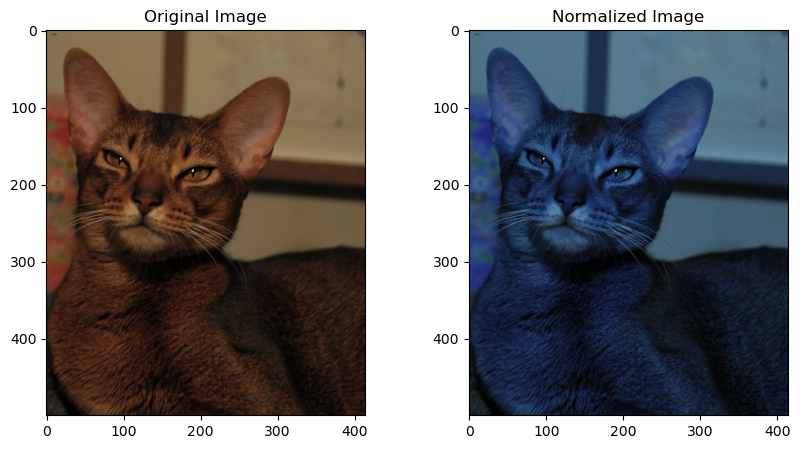

In [10]:
img = cv2.imread('data/Cat/' + "/" + cat_data[156])
normalized_img = img / 255.0 # type: ignore

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(normalized_img)
ax[1].set_title('Normalized Image')
plt.show()

## DATA VISUALIZATION:
### Sample Images from Dataset:

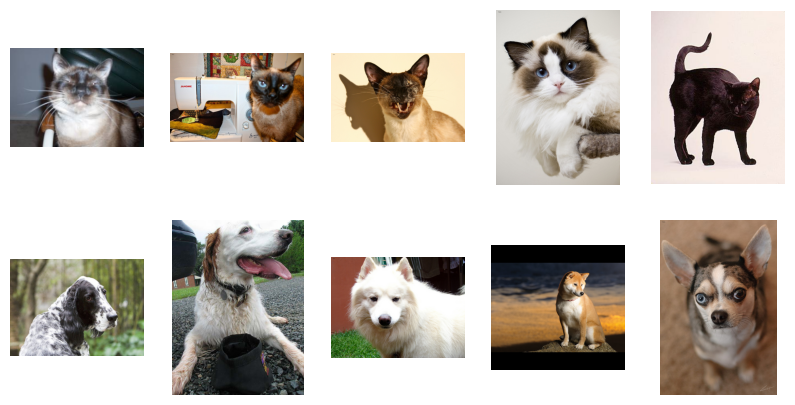

In [11]:
cat_dir = 'data/Cat'
dog_dir = 'data/Dog'

cat_samples = random.sample(cat_data, 5)
dog_samples = random.sample(dog_data, 5)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, file in enumerate(cat_samples):
    img = cv2.imread(os.path.join(cat_dir, file))
    axes[0][i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0][i].axis('off')
for i, file in enumerate(dog_samples):
    img = cv2.imread(os.path.join(dog_dir, file))
    axes[1][i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[1][i].axis('off')
plt.show()

### Pixel Intensity Distribution:

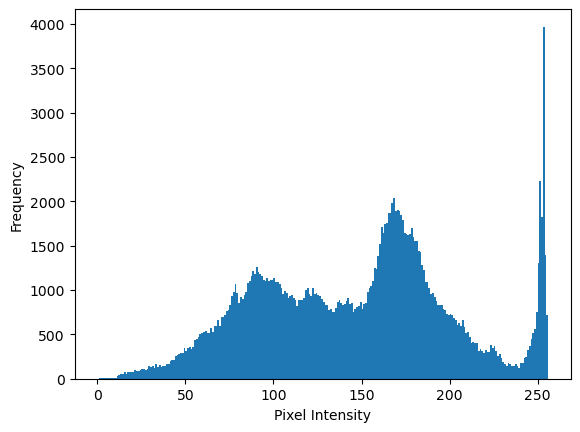

In [12]:
img = cv2.imread('data/Cat/' + "/" + cat_data[486])
plt.hist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

### Colour Channel Analysis:

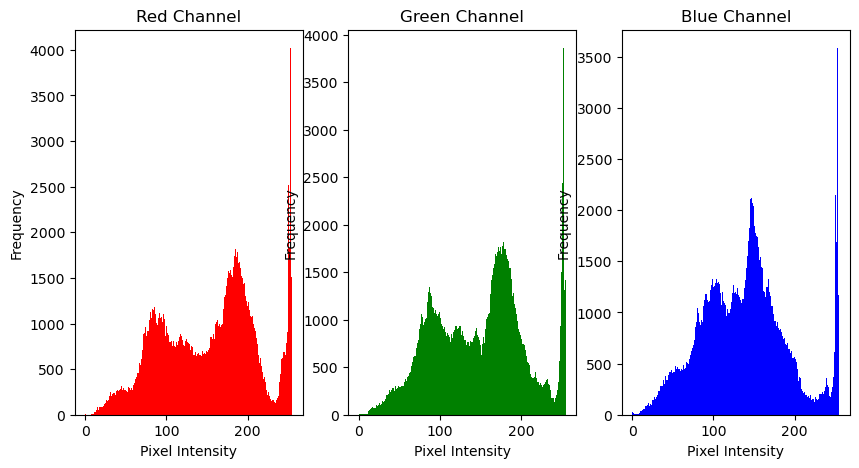

In [13]:
img = cv2.imread('data/Cat/' + "/" + cat_data[486])

red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(red_channel.ravel(), bins=256, color='red')
ax[0].set_xlabel('Pixel Intensity')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Red Channel')
ax[1].hist(green_channel.ravel(), bins=256, color='green')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Green Channel')
ax[2].hist(blue_channel.ravel(), bins=256, color='blue')
ax[2].set_xlabel('Pixel Intensity')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Blue Channel')
plt.show()

### Distribution of Classes:

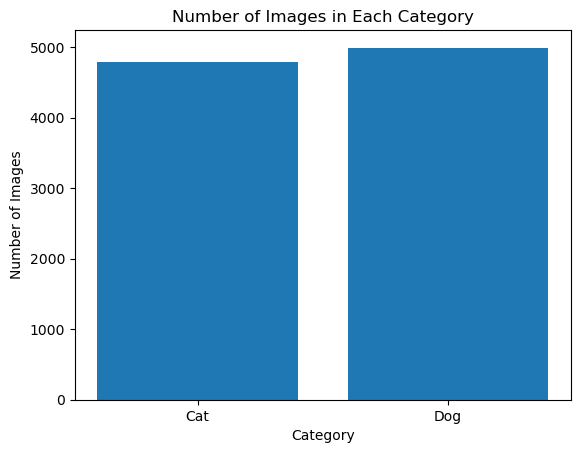

In [14]:
num_cat_images = len(cat_data)
num_dog_images = len(dog_data)

categories = ['Cat', 'Dog']
counts = [num_cat_images, num_dog_images]
plt.bar(categories, counts)
plt.title('Number of Images in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

Since the cat class has a comparatively lower number of images than the dog class, the model may be prone to overfitting. Therefore, it is essential to apply image augmentation techniques such as rotation, flipping, brightness and contrast adjustment, and several other techniques.

### Image Rotation for Imblance in dataset

### Preparing train and test Image Generator

In [15]:
# from PIL import Image
# import os

# folder_path = "data/Cat"
# rotated_folder_path = "data/Cat"

# # Create the rotated folder if it doesn't exist
# os.makedirs(rotated_folder_path, exist_ok=True)

# # Iterate over the images in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(".jpg"):
#         image_path = os.path.join(folder_path, filename)

#         # Open the image
#         image = Image.open(image_path)

#         # Rotate the image 180 degrees
#         rotated_image = image.transpose(Image.FLIP_LEFT_RIGHT)

#         # Convert the image to RGB mode
#         rotated_image = rotated_image.convert("RGB")

#         # Create a new filename for the rotated image
#         rotated_image_file = "rotated_" + filename

#         # Save the rotated image back to the rotated folder
#         rotated_image_path = os.path.join(rotated_folder_path, rotated_image_file)
#         rotated_image.save(rotated_image_path)

#         print(f"Rotated image saved: {rotated_image_path}")


In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
width = 128
height = 128

In [18]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [19]:
trainDatagen = datagen.flow_from_directory(directory='data',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='training')

Found 7820 images belonging to 2 classes.


In [20]:
valDatagen = datagen.flow_from_directory(directory='data',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 32,
                                           subset='validation')

Found 1954 images belonging to 2 classes.


In [21]:
print(trainDatagen.class_indices)

{'Cat': 0, 'Dog': 1}


### Preparing the model

In [22]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

#### Compiling model

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### Early stop mechanism

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

#### Fitting model

In [27]:
with tf.device('/GPU:0'):
    history = model.fit(x=trainDatagen,
                        steps_per_epoch=len(trainDatagen),
                        epochs=20,
                        validation_data=valDatagen,
                        validation_steps=len(valDatagen),
                        callbacks=[early_stop])

Epoch 1/20
245/245 [==============================] - 50s 179ms/step - loss: 0.6833 - accuracy: 0.5590 - val_loss: 0.6734 - val_accuracy: 0.5655
Epoch 2/20
245/245 [==============================] - 33s 135ms/step - loss: 0.6307 - accuracy: 0.6448 - val_loss: 0.6047 - val_accuracy: 0.6766
Epoch 3/20
245/245 [==============================] - 32s 130ms/step - loss: 0.5732 - accuracy: 0.7058 - val_loss: 0.5499 - val_accuracy: 0.7190
Epoch 4/20
245/245 [==============================] - 37s 152ms/step - loss: 0.5416 - accuracy: 0.7281 - val_loss: 0.5046 - val_accuracy: 0.7605
Epoch 5/20
245/245 [==============================] - 39s 159ms/step - loss: 0.5113 - accuracy: 0.7503 - val_loss: 0.4999 - val_accuracy: 0.7410
Epoch 6/20
245/245 [==============================] - 33s 135ms/step - loss: 0.4793 - accuracy: 0.7691 - val_loss: 0.4948 - val_accuracy: 0.7692
Epoch 7/20
245/245 [==============================] - 30s 123ms/step - loss: 0.4622 - accuracy: 0.7811 - val_loss: 0.4782 - val_ac

In [29]:
num_epochs_run = len(history.epoch)
num_epochs_run

10

#### Plots

In [30]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

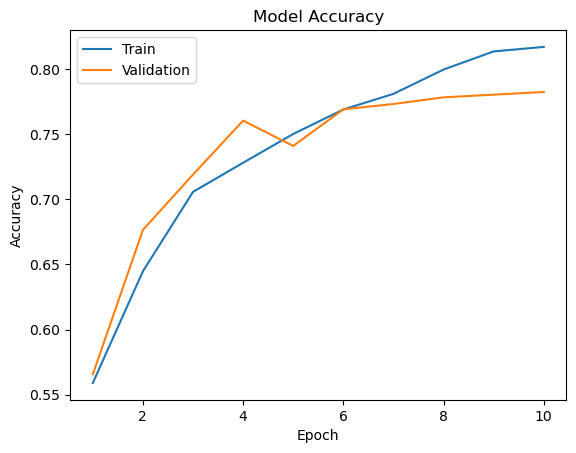

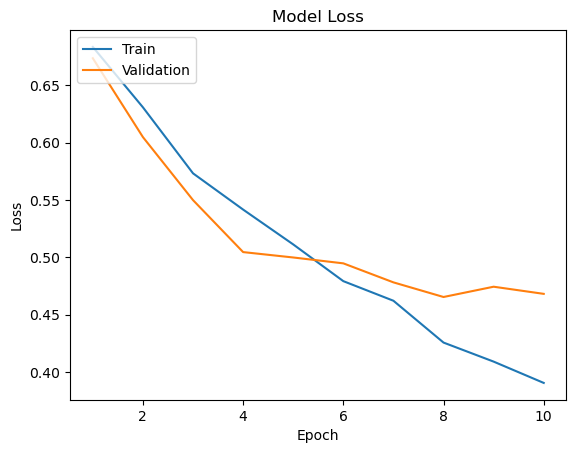

In [31]:
plotLearningCurve(history,num_epochs_run)

#### Classification Report

In [32]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

pred = model.predict(valDatagen)
pred = np.round(pred).astype(int).reshape(1,-1)[0]
print(classification_report(valDatagen.classes,pred,target_names=['Cat','Dog']))

62/62 [==============================] - 9s 135ms/step
              precision    recall  f1-score   support

         Cat       0.48      0.43      0.45       956
         Dog       0.51      0.56      0.53       998

    accuracy                           0.50      1954
   macro avg       0.49      0.49      0.49      1954
weighted avg       0.49      0.50      0.49      1954



#### Accuracy of the model

In [33]:
print("Accuracy: ",max(history.history['accuracy'])*100)

Accuracy:  81.71355724334717


#### Saving model

In [34]:
model.save("models/basemodel.h5")

### Transfer Learning - VGG16

In [35]:
from tensorflow.keras.layers import Input,Dense,Flatten,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [36]:
IMAGE_SIZE = [128,128]

In [37]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [38]:
vgg.layers

In [39]:
for layer in vgg.layers:
    layer.trainable = False

In [40]:
x = Flatten()(vgg.output)
D1 = Dense(512, activation='relu')(x)
D2 = Dense(256, activation='relu')(D1)
dropout = Dropout(0.5)(D2)
prediction = Dense(1, activation='sigmoid')(dropout)

In [41]:
model1 = Model(inputs=vgg.input, outputs=prediction)

In [42]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [43]:
with tf.device('/GPU:0'):
    history1 = model1.fit(x=trainDatagen,
                        steps_per_epoch=len(trainDatagen),
                        epochs=10,
                        validation_data=valDatagen,
                        validation_steps=len(valDatagen),
                        callbacks=[early_stop])

Epoch 1/10
245/245 [==============================] - 42s 160ms/step - loss: 0.4236 - accuracy: 0.8049 - val_loss: 0.2892 - val_accuracy: 0.8715
Epoch 2/10
245/245 [==============================] - 32s 130ms/step - loss: 0.2726 - accuracy: 0.8839 - val_loss: 0.4910 - val_accuracy: 0.7764
Epoch 3/10
245/245 [==============================] - 32s 129ms/step - loss: 0.2157 - accuracy: 0.9056 - val_loss: 0.2297 - val_accuracy: 0.8987
Epoch 4/10
245/245 [==============================] - 32s 130ms/step - loss: 0.1688 - accuracy: 0.9344 - val_loss: 0.1936 - val_accuracy: 0.9202
Epoch 5/10
245/245 [==============================] - 32s 130ms/step - loss: 0.1365 - accuracy: 0.9494 - val_loss: 0.1715 - val_accuracy: 0.9284
Epoch 6/10
245/245 [==============================] - 31s 128ms/step - loss: 0.1118 - accuracy: 0.9569 - val_loss: 0.2144 - val_accuracy: 0.9145
Epoch 7/10
245/245 [==============================] - 31s 128ms/step - loss: 0.0803 - accuracy: 0.9687 - val_loss: 0.2423 - val_ac

In [44]:
num_epochs_run = len(history1.epoch)
num_epochs_run

7

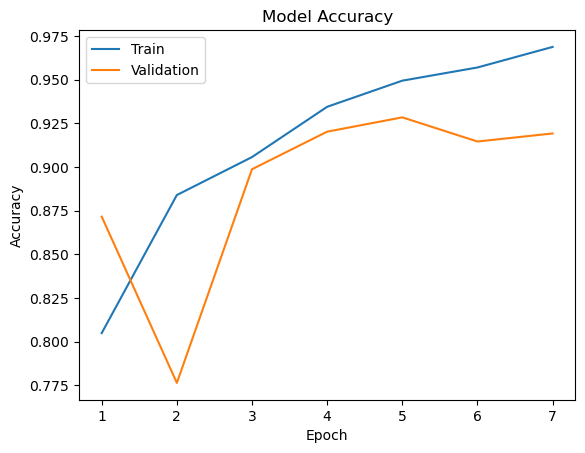

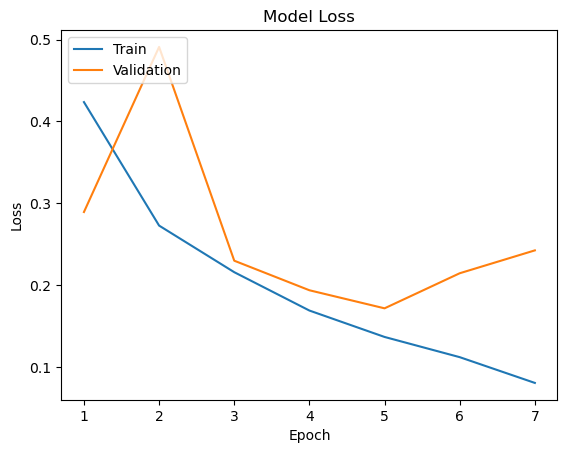

In [45]:
plotLearningCurve(history1,num_epochs_run)

In [49]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

pred1 = model1.predict(valDatagen)
pred1 = np.round(pred1).astype(int).reshape(1,-1)[0]
print(classification_report(valDatagen.classes,pred1,target_names=['Cat','Dog']))

62/62 [==============================] - 7s 113ms/step
              precision    recall  f1-score   support

         Cat       0.46      0.49      0.48       956
         Dog       0.48      0.46      0.47       998

    accuracy                           0.47      1954
   macro avg       0.47      0.47      0.47      1954
weighted avg       0.47      0.47      0.47      1954



In [50]:
print("Accuracy: ",max(history1.history['accuracy'])*100)

Accuracy:  96.86700701713562


In [48]:
model1.save("models/vgg.h5")